# APS1070
#### Basic Principles and Models - Project 1
**Deadline: Sep 27, 23:59 - 14 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: **Chenxu Liu**  *(here and elsewhere, please replace the underscore with your answer)*

Student ID: **1001297385**

##**Marking Scheme:**

This project is worth **14 marks** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).



# Project 1 [14 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [2]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

## Part 1: Getting started [4 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[1]**
* How many features do we have in this dataset? **30**
* What are the target classes? **0 and 1**
* What do these target classes signify?  **0: Malignant, 1: Benign**
* How many participants tested `Malignant`? **212**
* How many participants tested `Benign`? **357**


In [3]:
### YOUR CODE HERE ###
import pandas as pd
data=dataset.data
target=dataset.target
feature_names=dataset.feature_names
df=pd.DataFrame(data,columns=feature_names)
df['target']=pd.DataFrame(target)
print('Number of features:',df.shape[1]-1)
print('Target classes:',df['target'].unique())
print('Meaning of  target classes:',dataset.target_names)
num_of_malignant=df[df['target']==0].shape[0]
num_of_benign=df[df['target']==1].shape[0]
print('Number of Malignant:',num_of_malignant)
print('Number of Benign:',num_of_benign)

Number of features: 30
Target classes: [0 1]
Meaning of  target classes: ['malignant' 'benign']
Number of Malignant: 212
Number of Benign: 357


Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the dataset. Draw a plot where the x-axis is "mean radius", the y-axis is "mean texture," and the color of each datapoint indicates its class. Do this once again for different features for the x- and y-axis and see how the data is distributed. **[1]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Why? **[1]**  
***The difference is that x and y both fall into same interval now. Because (x-mean) and std have same scale, the result of (x-mean)/std will have no unit since scales cancel out. In this way, when we calculate the distance between different points those data with larger scale will not dominant the calculation of distance. ***

It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however). To tune `k` (our hyperparameter), we employ cross-validation ([Help](https://scikit-learn.org/stable/modules/cross_validation.html)). Cross-validation automatically selects validation subsets from the data that you provided. Split the dataset into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[1]**



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


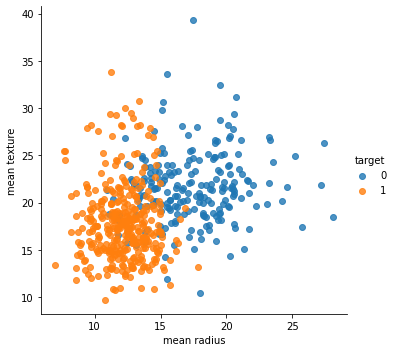

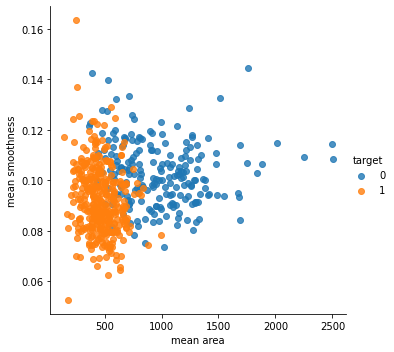

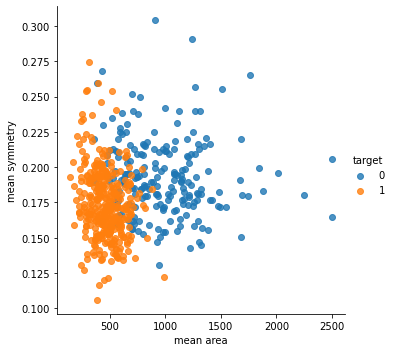

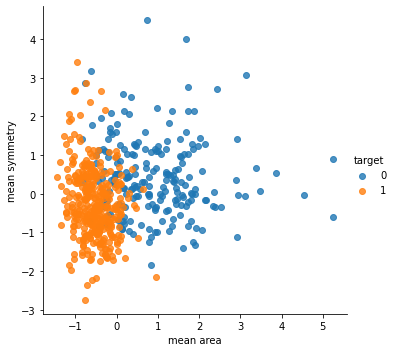

In [4]:
### YOUR CODE HERE ###
import seaborn as sns
#- - - - - - Q1 - - - - - -
fig1=sns.lmplot(x='mean radius',y='mean texture',data=df,hue='target',fit_reg=False)
fig2=sns.lmplot(x='mean area',y='mean smoothness',data=df,hue='target',fit_reg=False)
#- - - - - - Q2 - - - - - -
before_standardization=sns.lmplot(x='mean area',y='mean symmetry',data=df,hue='target',fit_reg=False)
import numpy as np
x=df['mean area']
y=df['mean symmetry']
target=df['target']
x_standardized=(x-np.mean(x))/np.std(x)
y_standardized=(y-np.mean(y))/np.std(y)
data_standardized=pd.concat([x_standardized,y_standardized,target],axis=1)
after_standardization=sns.lmplot(x='mean area',y='mean symmetry',data=data_standardized,hue='target',fit_reg=False)
#- - - - - - Q3 - - - - - -
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=0)





## Part 2: KNN Classifier without Standardization [3 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? Comment on  which `k`s lead to underfitted or overfitted models. **[1]** 
  **Best ks are 10 and 11, ks between [1,10) lead to overfit and ks between (11,100] lead to underfit.**
3.   Can you get the same accuracy (roughly) with fewer features using a KNN model? You're free to use trial-and-error to remove features (try at least 5 combinations), or use a more sophisticated approach like [Backward Elimination](https://towardsdatascience.com/backward-elimination-for-feature-selection-in-machine-learning-c6a3a8f8cef4). 
Describe your findings using a graph or table (or multiple!). **[1]** ***From the plotted graph, only six features will obviously affect the accuracy score, and those features are: worst area, mean area, area error, mean texture, worst perimeter and worst texture. As long as we keep these features, we can remove some of other features. I removed five combinations of features and each shows the same accuracy score. I think the reason for this is that those six features have significantly large scale comparing to other features, so they will have large weight in calculation of distance, which makes the model more sensitive to those six features. ***



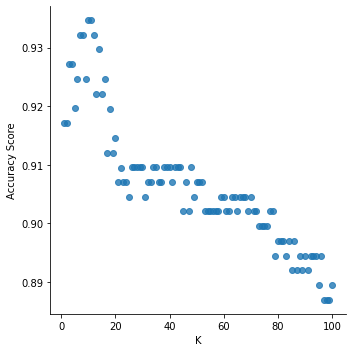

In [5]:
### YOUR CODE HERE ###
#- - - - - Q1 - - - - - -
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
K=[]
score=[]
for n in range(100):
    knn=KNeighborsClassifier(n_neighbors=n+1)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    scores_mean=np.mean(scores)
    score.append(scores_mean)
    K.append(n+1)
    n+=1
result={'K':K,'Accuracy Score':score}
result=pd.DataFrame(result)
plot=sns.lmplot(x='K',y='Accuracy Score',data=result,fit_reg=False)

In [6]:
#- - - - - - Q2 - - - - - -
sorted_result=result.sort_values(by=['Accuracy Score'],ascending=False)
print(sorted_result.head())


     K  Accuracy Score
9   10        0.934652
10  11        0.934652
6    7        0.932152
7    8        0.932152
11  12        0.932120


Features can affect accuracy: Index(['worst area', 'mean area', 'area error', 'mean texture',
       'worst perimeter', 'worst texture'],
      dtype='object')
Accuracy Score after removing mean symmetry and mean radius: 0.9346518987341772
Accuracy Score after removing mean perimeter and mean radius: 0.9346518987341772
Accuracy Score after removing mean concavity and mean radius: 0.9346518987341772
Accuracy Score after removing mean perimeter and mean concavity: 0.9346518987341772
Accuracy Score after removing mean smoothness and mean perimeter: 0.9346518987341772


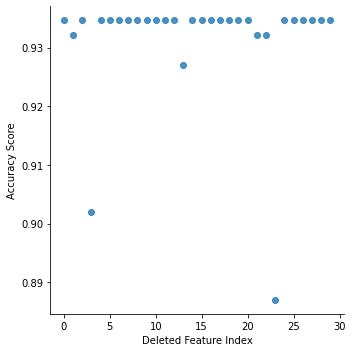

In [7]:
#- - - - - - Q3 - - - - - -
features=X_train.columns
knn=KNeighborsClassifier(n_neighbors=11)
n=0
score=[]
feature_index=[]
for i in range(30):
    new_X_train=X_train.drop(features[n],axis=1)
    scores=cross_val_score(knn,new_X_train,y_train,cv=5)
    scores_mean=np.mean(scores)
    score.append(scores_mean)
    feature_index.append(n)
    n+=1
feature_score={'Deleted Feature Index':feature_index,'Accuracy Score':score}
feature_score_df=pd.DataFrame(feature_score)
plot2=sns.lmplot(x='Deleted Feature Index',y='Accuracy Score',data=feature_score_df,fit_reg=False)
index=feature_score_df['Accuracy Score'].sort_values().index[:6]
print('Features can affect accuracy:',features[index])
#Remove five combinations of features and show accuracy
X_train_new_1=X_train.drop(['mean symmetry','mean radius'],axis=1)
X_train_new_2=X_train.drop(['mean perimeter','mean radius'],axis=1)
X_train_new_3=X_train.drop(['mean concavity','mean radius'],axis=1)
X_train_new_4=X_train.drop(['mean perimeter','mean concavity'],axis=1)
X_train_new_5=X_train.drop(['mean smoothness','mean perimeter'],axis=1)
scores_1=cross_val_score(knn,X_train_new_1,y_train,cv=5)
scores_2=cross_val_score(knn,X_train_new_2,y_train,cv=5)
scores_3=cross_val_score(knn,X_train_new_3,y_train,cv=5)
scores_4=cross_val_score(knn,X_train_new_4,y_train,cv=5)
scores_5=cross_val_score(knn,X_train_new_5,y_train,cv=5)
scores_mean_1=np.mean(scores_1)
scores_mean_2=np.mean(scores_2)
scores_mean_3=np.mean(scores_3)
scores_mean_4=np.mean(scores_4)
scores_mean_5=np.mean(scores_5)
print('Accuracy Score after removing mean symmetry and mean radius:',scores_mean_1)
print('Accuracy Score after removing mean perimeter and mean radius:',scores_mean_2)
print('Accuracy Score after removing mean concavity and mean radius:',scores_mean_3)
print('Accuracy Score after removing mean perimeter and mean concavity:',scores_mean_4)
print('Accuracy Score after removing mean smoothness and mean perimeter:',scores_mean_5)


## Part 3: Standardization [2 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

Note: When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Create a KNN classifier with standardized data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)), and reproduce all steps in Part 2. **[1]**

2. Does standardization lead to better model performance? Is performance better or worst? Discuss. **[1]** **Model performance was imporved by around 3.3%, because standardization of data makes each feature have same weight in distance calculation. When the model treates each feature equally, those featrues that are more important but with smaller scale will not be underestimated by the model. Also, there are two features: mean symmetry and compactness error, if we remove these two features, the accuracy score of the original model will increase a little. After using features without mean symmetry and compactness error, a model with different k value(k=11) and better performance(accuracy 97.25%)was found.**


     K  Accuracy Score
9   10        0.967437
6    7        0.964937
7    8        0.964937
10  11        0.964905
11  12        0.962405


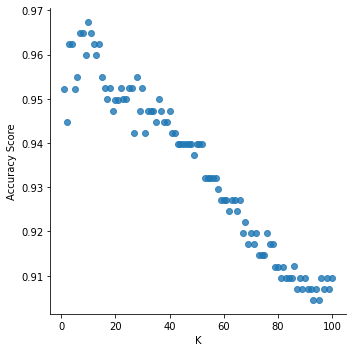

In [8]:
### YOUR CODE HERE ###
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
standard_X_train=scaler.fit(X_train)
standard_X_train=scaler.transform(X_train)
standard_X_train=pd.DataFrame(standard_X_train,columns=features)
K=[]
score=[]
for n in range(100):
    knn=KNeighborsClassifier(n_neighbors=n+1)
    scores=cross_val_score(knn,standard_X_train,y_train,cv=5)
    scores_mean=np.mean(scores)
    score.append(scores_mean)
    K.append(n+1)
    n+=1
result={'K':K,'Accuracy Score':score}
result=pd.DataFrame(result)
plot=sns.lmplot(x='K',y='Accuracy Score',data=result,fit_reg=False)
sorted_result=result.sort_values(by=['Accuracy Score'],ascending=False)
print(sorted_result.head())


Features can obviously affect accuracy: Index(['mean texture', 'worst texture', 'mean radius', 'symmetry error',
       'worst concavity', 'mean perimeter', 'mean fractal dimension'],
      dtype='object')
Features can imporve performance: Index(['mean symmetry', 'compactness error'], dtype='object')
Accuracy Score after removing two features: 0.9699683544303797


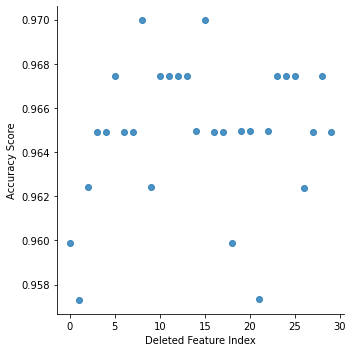

In [9]:
features=X_train.columns
knn=KNeighborsClassifier(n_neighbors=10)
n=0
score=[]
feature_index=[]
for i in range(30):
    new_standard_X_train=standard_X_train.drop(features[n],axis=1)
    scores=cross_val_score(knn,new_standard_X_train,y_train,cv=5)
    scores_mean=np.mean(scores)
    score.append(scores_mean)
    feature_index.append(n)
    n+=1
feature_score={'Deleted Feature Index':feature_index,'Accuracy Score':score}
feature_score_df=pd.DataFrame(feature_score)
plot2=sns.lmplot(x='Deleted Feature Index',y='Accuracy Score',data=feature_score_df,fit_reg=False)
index=feature_score_df['Accuracy Score'].sort_values().index[:7]
index_1=feature_score_df['Accuracy Score'].sort_values(ascending=False).index[:2]
print('Features can obviously affect accuracy:',features[index])
print('Features can imporve performance:',features[index_1])
#Remove two features that can improve model performance
standard_X_train_new=standard_X_train.drop(['mean symmetry','compactness error'],axis=1)
scores=cross_val_score(knn,standard_X_train_new,y_train,cv=5)
scores_mean=np.mean(scores)
print('Accuracy Score after removing two features:',scores_mean)

     K  Accuracy Score
10  11        0.972468
9   10        0.969968
11  12        0.969968
7    8        0.967437
2    3        0.964937


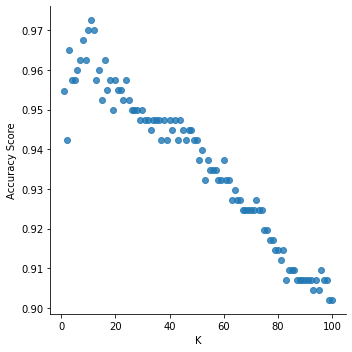

In [10]:
#Find best K without mean symmetry and compactness error
K=[]
score=[]
for n in range(100):
    knn=KNeighborsClassifier(n_neighbors=n+1)
    scores=cross_val_score(knn,standard_X_train_new,y_train,cv=5)
    scores_mean=np.mean(scores)
    score.append(scores_mean)
    K.append(n+1)
    n+=1
result={'K':K,'Accuracy Score':score}
result=pd.DataFrame(result)
plot=sns.lmplot(x='K',y='Accuracy Score',data=result,fit_reg=False)
sorted_result=result.sort_values(by=['Accuracy Score'],ascending=False)
print(sorted_result.head())

## Part 4: Test Data [1 Mark]

Now that you've created several models, pick your best one (highest accuracy) and apply it to the test dataset you had initially set aside. Discuss. **[1]** **The accuracy result of test data is a little bit lower than that of training data but acceptable, which means there is no overfitting issue.**

In [11]:
### YOUR CODE HERE ###
from sklearn.metrics import accuracy_score
#Standardize test set with straining set's mean and std
standard_X_test=scaler.transform(X_test)
standard_X_test=pd.DataFrame(standard_X_test,columns=features)
#Remove mean symmetry and compactness error in test set
standard_X_test_new=standard_X_test.drop(['mean symmetry','compactness error'],axis=1)
knn_11=KNeighborsClassifier(n_neighbors=11)
#Train best model without mean symmetry and compactness error in training set 
knn_11.fit(standard_X_train_new,y_train)
accuracy = accuracy_score(y_test, knn_11.predict(standard_X_test_new))
print ('Test set accuracy: ', accuracy )

Test set accuracy:  0.9590643274853801


## Part 5: New Dataset [4 Marks]
Find an appropriate classification dataset online and train a KNN model to make predictions.

*   Introduce your dataset. **[1]** **The wine data has 178 samples, 13 features. There are 3 classes of wine, class_0(0), class_1(1), class_2(2). Number of samples in class 0, class 1 and class 2 : 59,71 and 48.**
*   Create a KNN classifier using the tools you've learned. **[2]**
*   Present your results. **[1]** **The model has best performance with k=23 and k=29 before feature selection,and after removing each feaeture and recalculate accuracy, the best accuracy of model with k=23 decreased and the best accuracy of model with k=29 increased. Therefore the best model is k=29 and removing feature 8. The accuracy for test set is 98.15%. (Considering this is a small dataset, the actual error in real-world dataset might be higher than 1.85%.)**

Hint: you can find various datasets here: https://www.kaggle.com/datasets and here: https://scikit-learn.org/stable/datasets/index.html#toy-datasets.

To use a dataset in Colab, you can upload it in your Google drive and access it in Colab ([help here](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)), or you can download the dataset on your local machine and upload it directly to Colab using the following script.

```
from google.colab import files
uploaded = files.upload()
```

When submitting your project on Quercus, please make sure you are also uploading your dataset so we can fully run your notebook.

Number of Samples: 178
Number of Features: 13
Classes are: ['class_0' 'class_1' 'class_2']
Target Labels: [0 1 2]
Number of Class 0: 59
Number of Class 1: 71
Number of Class 2: 48
     K  Accuracy Score
22  23        0.967667
28  29        0.967667
25  26        0.959667
24  25        0.959667
26  27        0.959667


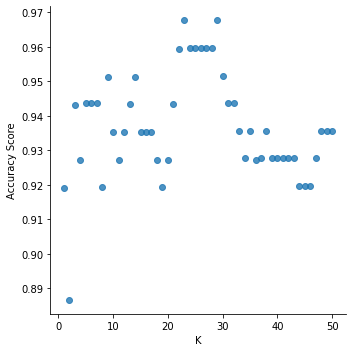

In [36]:
### YOUR CODE HERE ###
from sklearn.datasets import load_wine
new_dataset=load_wine()
new_data=new_dataset.data
new_target=new_dataset.target
new_feature_names=new_dataset.feature_names
new_df=pd.DataFrame(new_data,columns=new_feature_names)
new_df['target']=pd.DataFrame(new_target)
new_X=new_df.iloc[:,:-1]
new_y=new_df.iloc[:,-1]
print('Number of Samples:',new_X.shape[0])
print('Number of Features:',new_X.shape[1])
print('Classes are:',new_dataset.target_names)
print('Target Labels:',new_y.unique())
num_of_0=new_df[new_df['target']==0].shape[0]
num_of_1=new_df[new_df['target']==1].shape[0]
num_of_2=new_df[new_df['target']==2].shape[0]
print('Number of Class 0:',num_of_0)
print('Number of Class 1:',num_of_1)
print('Number of Class 2:',num_of_2)
new_X_train,new_X_test,new_y_train,new_y_test=train_test_split(new_X,new_y,test_size=0.3,random_state=23)
#Find best K
scaler_1=StandardScaler()
standard_new_X_train=scaler_1.fit(new_X_train)
standard_new_X_train=scaler_1.transform(new_X_train)
K=[]
score=[]
for n in range(50):
    knn=KNeighborsClassifier(n_neighbors=n+1)
    scores=cross_val_score(knn,standard_new_X_train,new_y_train,cv=5)
    scores_mean=np.mean(scores)
    score.append(scores_mean)
    K.append(n+1)
    n+=1
result={'K':K,'Accuracy Score':score}
result=pd.DataFrame(result)
plot=sns.lmplot(x='K',y='Accuracy Score',data=result,fit_reg=False)
sorted_result=result.sort_values(by=['Accuracy Score'],ascending=False)
print(sorted_result.head())


In [33]:
#Feature selection
knn_23=KNeighborsClassifier(n_neighbors=23)
knn_29=KNeighborsClassifier(n_neighbors=29)
scores_knn_23=[]
scores_knn_29=[]
standard_new_X_train=pd.DataFrame(standard_new_X_train,columns=new_feature_names)
for i in range(13):
    standard_new_X_train_fs=standard_new_X_train.drop(new_feature_names[i],axis=1)
    scores=cross_val_score(knn_23,standard_new_X_train_fs,new_y_train,cv=5)
    scores_mean=np.mean(scores)
    scores_knn_23.append(scores_mean)
for i in range(13):
    standard_new_X_train_fs=standard_new_X_train.drop(new_feature_names[i],axis=1)
    scores=cross_val_score(knn_29,standard_new_X_train_fs,new_y_train,cv=5)
    scores_mean=np.mean(scores)
    scores_knn_29.append(scores_mean)
print('Best accuracy with k=23: {}, feature removed: {}'.format(max(scores_knn_23),scores_knn_23.index(max(scores_knn_23))))
print('Best accuracy with k=29: {}, feature removed: {}'.format(max(scores_knn_29),scores_knn_29.index(max(scores_knn_29))))



Best accuracy with k=23: 0.9596666666666666, feature removed: 2
Best accuracy with k=29: 0.9756666666666666, feature removed: 8


     K  Accuracy Score
28  29        0.975667
32  33        0.967667
30  31        0.967667
26  27        0.967667
23  24        0.959667


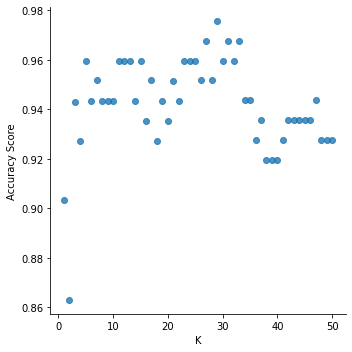

In [28]:
#Find best k without feature 8
standard_new_X_train_fs=standard_new_X_train.drop(new_feature_names[8],axis=1)
K=[]
score=[]
for n in range(50):
    knn=KNeighborsClassifier(n_neighbors=n+1)
    scores=cross_val_score(knn,standard_new_X_train_fs,new_y_train,cv=5)
    scores_mean=np.mean(scores)
    score.append(scores_mean)
    K.append(n+1)
    n+=1
result={'K':K,'Accuracy Score':score}
result=pd.DataFrame(result)
plot=sns.lmplot(x='K',y='Accuracy Score',data=result,fit_reg=False)
sorted_result=result.sort_values(by=['Accuracy Score'],ascending=False)
print(sorted_result.head())


In [32]:
#Test with best model
standard_new_X_test=scaler_1.transform(new_X_test)
standard_new_X_test=pd.DataFrame(standard_new_X_test,columns=new_feature_names).drop(new_feature_names[8],axis=1)
knn=KNeighborsClassifier(n_neighbors=29)
knn.fit(standard_new_X_train_fs,new_y_train)
accuracy = accuracy_score(new_y_test, knn.predict(standard_new_X_test))
print ('Test set accuracy with {} neighbors is: {}'.format(29,accuracy))


Test set accuracy with 29 neighbors is: 0.9814814814814815
